In [1]:
import psycopg2
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
import io
import schedule
import time
from datetime import date, timedelta
import win32com.client as win32
import teradatasql
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import telebot
import logging

c:\Users\vitaly.flerin\Miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\vitaly.flerin\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
c:\Users\vitaly.flerin\Miniconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df=pd.read_csv('tmp_ak_home_tile_nps_fbc_v2.csv')
pd.set_option('display.max_columns', 100) 
df

,subs_id,report_date,branch_id,region_nps,region_tele2,ts1m,operator,ltr,nps,nps_category,home_sector,maxdata_sector,home_lon,home_lat,maxdata_lon,maxdata_lat,home_tile,maxdata_tile,s2_cell_id_13,uniq_users_tile,first_buf_count_tech,fbc_ge_050sec,fbc_ge_075sec,fbc_ge_1sec,fbc_ge_2sec,fbc_ge_3sec,fbc_ge_4sec,fbc_ge_050sec_pc,fbc_ge_075sec_pc,fbc_ge_1sec_pc,fbc_ge_2sec_pc,fbc_ge_3sec_pc,fbc_ge_4sec_pc,pc_050sec_bad_fbc_top,pc_075sec_bad_fbc_top,pc_1sec_bad_fbc_top,pc_2sec_bad_fbc_top,pc_3sec_bad_fbc_top,pc_4sec_bad_fbc_top,gap_050sec,gap_075sec,gap_1sec,gap_2sec,gap_3sec,gap_4sec
0,44101852,01.02.2022,3.0,Ростов на Дону,Ростов-на-Дону,01.02.2022,Tele2,8.0,0,Passive,RO0461_2,RO0461_2,38.368700,47.331300,38.368700,47.331300,4675076797958717440,4675076797958717440,4675076797958717440,99,171,162,118,65,16,12,7,0.947368,0.690058,0.380117,0.093567,0.070175,0.040936,0.581031,0.344391,0.164672,0.025584,0.009022,0.004320,0.366338,0.345668,0.215445,0.067984,0.061153,0.036616
1,5319213,01.03.2022,3.0,Ростов на Дону,Ростов-на-Дону,01.03.2022,Tele2,10.0,1,Promoter,RO0458_1,RO0435_2,38.851778,47.217694,38.839472,47.186306,4675114421872230400,4675112566446358528,4675112566446358528,6648,6582,5766,4396,3033,897,433,253,0.876026,0.667882,0.460802,0.136281,0.065785,0.038438,0.539716,0.312464,0.158599,0.025131,0.009104,0.005058,0.336309,0.355418,0.302204,0.111150,0.056681,0.033380
2,6831969,01.06.2022,3.0,Ростов на Дону,Ростов-на-Дону,01.06.2022,Tele2,7.0,0,Passive,RO0416_1,RO0416_1,38.801278,47.242083,38.801278,47.242083,4675113700317724672,4675113700317724672,4675113700317724672,2392,4232,3562,2515,1685,547,269,168,0.841682,0.594282,0.398157,0.129253,0.063563,0.039698,0.558376,0.327201,0.180637,0.032861,0.011362,0.005241,0.283307,0.267081,0.217520,0.096392,0.052202,0.034457
3,68339938,01.08.2022,3.0,Ростов на Дону,Ростов-на-Дону,01.08.2022,Tele2,10.0,1,Promoter,RO0402_3,RO0454_1,38.884444,47.247694,38.874032,47.238485,4675114799829352448,4675114181354061824,4675114181354061824,37530,63809,54455,40003,27831,8905,4584,2941,0.853406,0.626918,0.436161,0.139557,0.071839,0.046091,0.561988,0.320732,0.182568,0.030085,0.011709,0.005874,0.291418,0.306186,0.253593,0.109472,0.060130,0.040217
4,66739797,01.11.2022,3.0,Ростов на Дону,Ростов-на-Дону,01.11.2022,Tele2,1.0,-1,Detractor,RO0414_1,RO0454_2,38.874333,47.232222,38.874032,47.238485,4675114559311183872,4675114181354061824,4675114181354061824,38037,73981,64733,52137,38122,12627,6223,3709,0.874995,0.704735,0.515294,0.170679,0.084116,0.050134,0.529289,0.345759,0.200501,0.040252,0.015661,0.008486,0.345706,0.358976,0.314794,0.130427,0.068455,0.041648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581046,100046896280,01.04.2023,68.0,Владивосток,Владивосток,01.04.2023,Tele2,2.0,-1,Detractor,VV0037_1,VV0080_1,132.366627,43.109271,132.347842,43.105319,6896098635482660864,6896098772921614336,6896098772921614336,3828,7862,6806,6521,6037,1148,352,172,0.865683,0.829433,0.767871,0.146019,0.044772,0.021877,0.692857,0.642451,0.578446,0.098829,0.027037,0.012556,0.172826,0.186982,0.189424,0.047190,0.017736,0.009322
581047,100071578653,01.02.2023,68.0,Владивосток,Владивосток,01.02.2023,Tele2,5.0,-1,Detractor,VV2090_1,VV0187_3,132.357271,43.097561,132.328046,43.077455,6896098738561875968,6896110455232659456,6896110455232659456,987,1978,1704,1633,1507,404,128,58,0.861476,0.825581,0.761881,0.204247,0.064712,0.029323,0.645179,0.605398,0.553484,0.121169,0.034900,0.014986,0.216297,0.220183,0.208397,0.083078,0.029812,0.014337
581048,100080686431,01.03.2023,68.0,Владивосток,Владивосток,01.03.2023,Tele2,10.0,1,Promoter,VV0073_1,VV0073_1,131.391151,42.853379,131.391151,42.853379,6896252979427409920,6896252979427409920,6896252979427409920,2268,6384,6006,5879,5611,2826,1594,1043,0.940789,0.920896,0.878916,0.442669,0.249687,0.163377,0.708110,0.663845,0.595697,0.132013,0.039119,0.016781,0.232680,0.257

In [79]:
df.isnull().sum()

subs_id                  0
report_date              0
branch_id                0
region_nps               0
region_tele2             0
ts1m                     0
operator                 0
ltr                      0
nps                      0
nps_category             0
home_sector              0
maxdata_sector           0
home_lon                 0
home_lat                 0
maxdata_lon              0
maxdata_lat              0
home_tile                0
maxdata_tile             0
s2_cell_id_13            0
uniq_users_tile          0
first_buf_count_tech     0
fbc_ge_050sec            0
fbc_ge_075sec            0
fbc_ge_1sec              0
fbc_ge_2sec              0
fbc_ge_3sec              0
fbc_ge_4sec              0
fbc_ge_050sec_pc         0
fbc_ge_075sec_pc         0
fbc_ge_1sec_pc           0
fbc_ge_2sec_pc           0
fbc_ge_3sec_pc           0
fbc_ge_4sec_pc           0
pc_050sec_bad_fbc_top    0
pc_075sec_bad_fbc_top    0
pc_1sec_bad_fbc_top      0
pc_2sec_bad_fbc_top      0
p

In [4]:
df.dropna(inplace = True)
df.isnull().sum()

subs_id                  0
report_date              0
branch_id                0
region_nps               0
region_tele2             0
ts1m                     0
operator                 0
ltr                      0
nps                      0
nps_category             0
home_sector              0
maxdata_sector           0
home_lon                 0
home_lat                 0
maxdata_lon              0
maxdata_lat              0
home_tile                0
maxdata_tile             0
s2_cell_id_13            0
uniq_users_tile          0
first_buf_count_tech     0
fbc_ge_050sec            0
fbc_ge_075sec            0
fbc_ge_1sec              0
fbc_ge_2sec              0
fbc_ge_3sec              0
fbc_ge_4sec              0
fbc_ge_050sec_pc         0
fbc_ge_075sec_pc         0
fbc_ge_1sec_pc           0
fbc_ge_2sec_pc           0
fbc_ge_3sec_pc           0
fbc_ge_4sec_pc           0
pc_050sec_bad_fbc_top    0
pc_075sec_bad_fbc_top    0
pc_1sec_bad_fbc_top      0
pc_2sec_bad_fbc_top      0
p

In [80]:
df.duplicated().sum()

0

In [82]:
df.describe()

,subs_id,branch_id,ltr,nps,home_lon,home_lat,maxdata_lon,maxdata_lat,home_tile,maxdata_tile,s2_cell_id_13,uniq_users_tile,first_buf_count_tech,fbc_ge_050sec,fbc_ge_075sec,fbc_ge_1sec,fbc_ge_2sec,fbc_ge_3sec,fbc_ge_4sec,fbc_ge_050sec_pc,fbc_ge_075sec_pc,fbc_ge_1sec_pc,fbc_ge_2sec_pc,fbc_ge_3sec_pc,fbc_ge_4sec_pc,pc_050sec_bad_fbc_top,pc_075sec_bad_fbc_top,pc_1sec_bad_fbc_top,pc_2sec_bad_fbc_top,pc_3sec_bad_fbc_top,pc_4sec_bad_fbc_top,gap_050sec,gap_075sec,gap_1sec,gap_2sec,gap_3sec,gap_4sec
count,5.810450e+05,581045.000000,581045.000000,581045.000000,581045.000000,581045.000000,581045.000000,581045.000000,5.810450e+05,5.810450e+05,5.810450e+05,5.810450e+05,5.810450e+05,5.810450e+05,5.810450e+05,5.810450e+05,581045.000000,581045.000000,581045.000000,581045.000000,581045.000000,581045.000000,581045.000000,581045.000000,581045.000000,581045.000000,581045.000000,581045.000000,581045.000000,581045.000000,581045.000000,581045.000000,581045.000000,581045.000000,581045.000000,581045.000000,581045.000000
mean,1.384419e+11,46.938716,7.500904,0.249482,52.834740,54.767825,52.788378,54.768939,5.019562e+18,5.020733e+18,5.020733e+18,9.187531e+04,1.523944e+05,1.331074e+05,1.050473e+05,7.691166e+04,26744.060691,13342.388891,7928.884623,0.875097,0.691738,0.508882,0.173611,0.085453,0.050940,0.559269,0.351060,0.200204,0.033018,0.011226,0.005411,0.315828,0.340678,0.308678,0.140593,0.074227,0.045529
std,1.087008e+11,37.546017,3.171737,0.891859,23.623606,4.091980,23.586005,4.068904,5.753023e+17,5.730198e+17,5.730198e+17,1.365505e+05,2.111336e+05,1.867983e+05,1.506392e+05,1.108783e+05,39057.349480,19576.926364,11592.678771,0.059419,0.115614,0.129244,0.074202,0.045197,0.032548,0.105365,0.124811,0.103757,0.029838,0.008673,0.003693,0.085356,0.087433,0.089256,0.064761,0.043261,0.031858
min,1.583650e+05,2.000000,1.000000,-1.000000,0.000000,0.000000,19.885462,42.421700,1.152922e+18,4.675029e+18,4.675029e+18,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.320417,0.124890,0.058399,0.007570,0.002579,0.001314,-0.744245,-0.606516,-0.522250,-0.337318,-0.158645,-0.100821
25%,6.561083e+07,14.000000,5.000000,-1.000000,37.661360,52.753483,37.646390,52.750361,4.703012e+18,4.703005e+18,4.703005e+18,7.098000e+03,1.502100e+04,1.318900e+04,1.036900e+04,7.489000e+03,2345.000000,1088.000000,623.000000,0.843287,0.613064,0.422688,0.129986,0.060423,0.034531,0.510011,0.263905,0.137174,0.020445,0.006925,0.003187,0.262881,0.294687,0.262777,0.104075,0.051140,0.029944
50%,1.000728e+11,35.000000,9.000000,1.000000,41.982778,55.343941,41.923211,55.345263,4.859922e+18,4.865190e+18,4.865190e+18,3.803700e+04,7.355400e+04,6.423700e+04,5.015700e+04,3.658000e+04,12526.000000,6187.000000,3681.000000,0.885381,0.699627,0.501319,0.165844,0.080451,0.047182,0.572444,0.354544,0.188128,0.029850,0.010182,0.004962,0.313523,0.342292,0.309257,0.135853,0.070012,0.042104
75%,2.000877e+11,69.000000,10.000000,1.000000,61.294005,56.629836,61.282947,56.630833,5.086590e+18,5.086759e+18,5.086759e+18,1.228800e+05,2.040500e+05,1.758840e+05,1.370720e+05,1.003630e+05,35040.000000,17526.000000,10433.000000,0.913841,0.769966,0.579825,0.205788,0.103743,0.062284,0.625679,0.435229,0.242018,0.038195,0.013621,0.006728,0.364132,0.390517,0.356966,0.171023,0.091700,0.056404
max,3.000675e+11,177.000000,10.000000,1.000000,162.585474,71.982945,162.585474,71.982945,6.896610e+18,6.896610e+18,6.896610e+18,1.413664e+06,1.928769e+06,1.743814e+06,1.473175e+06,1.094820e+06,397448.000000,202356.000000,118198.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.969691,0.929614,0.910824,0.591481,0.194554,0.119002,0.679583,0.875110,0.941601,0.991297,0.997003,0.998502


<Axes: >

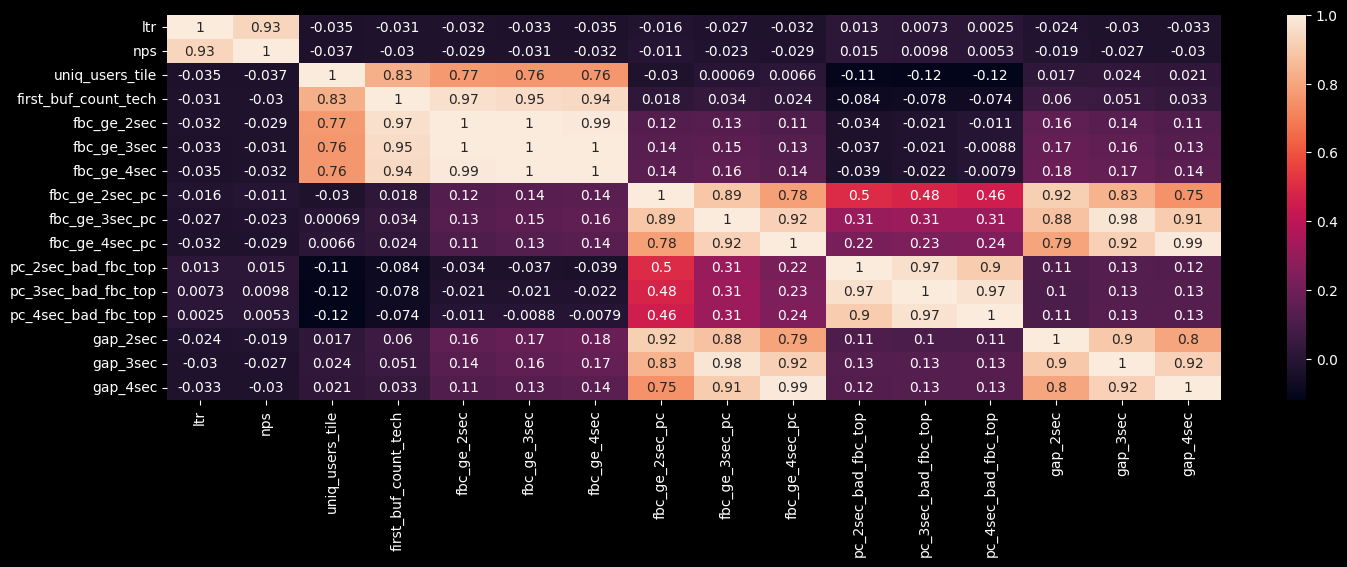

In [7]:
corr_matrix = df[['ltr', 'nps', 'uniq_users_tile',
       'first_buf_count_tech', 'fbc_ge_2sec', 'fbc_ge_3sec', 'fbc_ge_4sec',
       'fbc_ge_2sec_pc', 'fbc_ge_3sec_pc', 'fbc_ge_4sec_pc',
       'pc_2sec_bad_fbc_top', 'pc_3sec_bad_fbc_top', 'pc_4sec_bad_fbc_top',
       'gap_2sec', 'gap_3sec', 'gap_4sec']].corr()
fig, ax = plt.subplots(figsize = (17,5))
sns.heatmap(corr_matrix, annot=True)
#sns.pairplot(corr_matrix, kind='reg')

In [83]:
display(df.groupby(['report_date','maxdata_tile'], as_index = False).agg({'subs_id': "count"}).sort_values(by = 'subs_id', ascending = False))
display(df.groupby(['maxdata_tile'], as_index = False).agg({'subs_id': "count"}).sort_values(by = 'subs_id', ascending = False))

,report_date,maxdata_tile,subs_id
259579,01.12.2022,5086303320797085696,34
91666,01.03.2023,4883471256860491776,32
222592,01.10.2022,5097381931239079936,32
91650,01.03.2023,4883470604025462784,30
245710,01.12.2022,4675783921374330880,29
...,...,...,...
119631,01.04.2023,4704764333463175168,1
119632,01.04.2023,4704764402182651904,1
119633,01.04.2023,4704764436542390272,1
119635,01.04.2023,4704764505261867008,1


,maxdata_tile,subs_id
21435,4883471256860491776,241
21592,4883570453425160192,239
25469,5086303320797085696,228
21420,4883470707104677888,223
10497,4704794604392677376,214
...,...,...
29676,5095463111649918976,1
29675,5095462596253843456,1
29674,5095454556075065344,1
12595,4707526890787700736,1


In [84]:
#test
rd = '01.12.2022'
ht = [4702885886566596608, 4702893102111653888, 4702899321224298496]
df.query("region_nps == 'Мордовия' and report_date ==@rd and maxdata_tile == @ht ")

,subs_id,report_date,branch_id,region_nps,region_tele2,ts1m,operator,ltr,nps,nps_category,home_sector,maxdata_sector,home_lon,home_lat,maxdata_lon,maxdata_lat,home_tile,maxdata_tile,s2_cell_id_13,uniq_users_tile,first_buf_count_tech,fbc_ge_050sec,fbc_ge_075sec,fbc_ge_1sec,fbc_ge_2sec,fbc_ge_3sec,fbc_ge_4sec,fbc_ge_050sec_pc,fbc_ge_075sec_pc,fbc_ge_1sec_pc,fbc_ge_2sec_pc,fbc_ge_3sec_pc,fbc_ge_4sec_pc,pc_050sec_bad_fbc_top,pc_075sec_bad_fbc_top,pc_1sec_bad_fbc_top,pc_2sec_bad_fbc_top,pc_3sec_bad_fbc_top,pc_4sec_bad_fbc_top,gap_050sec,gap_075sec,gap_1sec,gap_2sec,gap_3sec,gap_4sec
122723,50159252,01.12.2022,51.0,Мордовия,Саранск,01.12.2022,Tele2,1.0,-1,Detractor,MV0271_2,MV0422_1,44.832391,54.027830,44.951455,54.058100,4703635719137001472,4702885886566596608,4702885886566596608,35160,63328,58238,50559,39687,17339,9756,6229,0.919625,0.798367,0.626690,0.273797,0.154055,0.098361,0.681627,0.42918,0.247154,0.048763,0.018758,0.009416,0.237997,0.369188,0.379536,0.225033,0.135297,0.088945
122724,51189110,01.12.2022,51.0,Мордовия,Саранск,01.12.2022,Tele2,10.0,1,Promoter,MV0422_1,MV0422_1,44.951455,54.058100,44.951455,54.058100,4702885886566596608,4702885886566596608,4702885886566596608,35160,63328,58238,50559,39687,17339,9756,6229,0.919625,0.798367,0.626690,0.273797,0.154055,0.098361,0.681627,0.42918,0.247154,0.048763,0.018758,0.009416,0.237997,0.369188,0.379536,0.225033,0.135297,0.088945
122725,65429859,01.12.2022,51.0,Мордовия,Саранск,01.12.2022,Tele2,5.0,-1,Detractor,MV0422_1,MV0169_2,44.951455,54.058100,44.953969,54.066361,4702885886566596608,4702885886566596608,4702885886566596608,35160,63328,58238,50559,39687,17339,9756,6229,0.919625,0.798367,0.626690,0.273797,0.154055,0.098361,0.681627,0.42918,0.247154,0.048763,0.018758,0.009416,0.237997,0.369188,0.379536,0.225033,0.135297,0.088945
426392,62809104,01.12.2022,51.0,Мордовия,Саранск,01.12.2022,Tele2,8.0,0,Passive,MV0017_2,MV0017_2,45.116227,54.292512,45.116227,54.292512,4702899321224298496,4702899321224298496,4702899321224298496,12090,73877,68259,55345,39102,11919,5331,2877,0.923955,0.749151,0.529285,0.161336,0.072160,0.038943,0.681627,0.42918,0.247154,0.048763,0.018758,0.009416,0.242327,0.319971,0.282131,0.112572,0.053402,0.029527
426393,48839600,01.12.2022,51.0,Мордовия,Саранск,01.12.2022,Tele2,3.0,-1,Detractor,MV0017_2,MV0017_2,45.116227,54.292512,45.116227,54.292512,4702899321224298496,4702899321224298496,4702899321224298496,12090,73877,68259,55345,39102,11919,5331,2877,0.923955,0.749151,0.529285,0.161336,0.072160,0.038943,0.681627,0.42918,0.247154,0.048763,0.018758,0.009416,0.242327,0.319971,0.282131,0.112572,0.053402,0.029527


Шаг 1. Агрегируем данные по месяцу, городу и тайлам, высчитываем средние показатели

In [87]:
t = df.groupby(['report_date', 'region_nps', 'maxdata_tile', 'ltr',	'nps'], 
                as_index = False).agg({'subs_id': "count", 
                                        'uniq_users_tile':'mean', 'first_buf_count_tech':'mean', 'fbc_ge_050sec':'mean', 'fbc_ge_075sec':'mean', 'fbc_ge_1sec':'mean',
                                        'fbc_ge_2sec':'mean', 'fbc_ge_3sec':'mean', 'fbc_ge_4sec': 'mean',
                                        'pc_050sec_bad_fbc_top':'mean',	'pc_075sec_bad_fbc_top':'mean',	'pc_1sec_bad_fbc_top':'mean', 
                                        'pc_2sec_bad_fbc_top':'mean', 'pc_3sec_bad_fbc_top':'mean', 'pc_4sec_bad_fbc_top':"mean"})
#test                                         
rd = '01.12.2022'
ht = [4702885886566596608, 4702893102111653888, 4702899321224298496]
t.query("region_nps == 'Мордовия' and report_date ==@rd and maxdata_tile== @ht ")

,report_date,region_nps,maxdata_tile,ltr,nps,subs_id,uniq_users_tile,first_buf_count_tech,fbc_ge_050sec,fbc_ge_075sec,fbc_ge_1sec,fbc_ge_2sec,fbc_ge_3sec,fbc_ge_4sec,pc_050sec_bad_fbc_top,pc_075sec_bad_fbc_top,pc_1sec_bad_fbc_top,pc_2sec_bad_fbc_top,pc_3sec_bad_fbc_top,pc_4sec_bad_fbc_top
431829,01.12.2022,Мордовия,4702885886566596608,1.0,-1,1,35160.0,63328.0,58238.0,50559.0,39687.0,17339.0,9756.0,6229.0,0.681627,0.42918,0.247154,0.048763,0.018758,0.009416
431830,01.12.2022,Мордовия,4702885886566596608,5.0,-1,1,35160.0,63328.0,58238.0,50559.0,39687.0,17339.0,9756.0,6229.0,0.681627,0.42918,0.247154,0.048763,0.018758,0.009416
431831,01.12.2022,Мордовия,4702885886566596608,10.0,1,1,35160.0,63328.0,58238.0,50559.0,39687.0,17339.0,9756.0,6229.0,0.681627,0.42918,0.247154,0.048763,0.018758,0.009416
431876,01.12.2022,Мордовия,4702899321224298496,3.0,-1,1,12090.0,73877.0,68259.0,55345.0,39102.0,11919.0,5331.0,2877.0,0.681627,0.42918,0.247154,0.048763,0.018758,0.009416
431877,01.12.2022,Мордовия,4702899321224298496,8.0,0,1,12090.0,73877.0,68259.0,55345.0,39102.0,11919.0,5331.0,2877.0,0.681627,0.42918,0.247154,0.048763,0.018758,0.009416


In [89]:
#считаем среднее на тайл, технические показатели

t_tech = t.groupby(['report_date', 'region_nps', 'maxdata_tile'], 
                as_index = False).agg({'subs_id': "sum", 'uniq_users_tile':'mean', 'first_buf_count_tech':'mean',
                                       'fbc_ge_050sec':'mean', 'fbc_ge_075sec':'mean', 'fbc_ge_1sec':'mean',
                                       'fbc_ge_2sec':'mean', 'fbc_ge_3sec':'mean', 'fbc_ge_4sec': 'mean',
                                       'pc_050sec_bad_fbc_top':'mean',	'pc_075sec_bad_fbc_top':'mean',	'pc_1sec_bad_fbc_top':'mean',
                                       'pc_2sec_bad_fbc_top':'mean','pc_3sec_bad_fbc_top':'mean', 'pc_4sec_bad_fbc_top':"mean"
                                       })


t_tech.query("region_nps == 'Мордовия' & maxdata_tile==@ht & report_date ==@rd ")



,report_date,region_nps,maxdata_tile,subs_id,uniq_users_tile,first_buf_count_tech,fbc_ge_050sec,fbc_ge_075sec,fbc_ge_1sec,fbc_ge_2sec,fbc_ge_3sec,fbc_ge_4sec,pc_050sec_bad_fbc_top,pc_075sec_bad_fbc_top,pc_1sec_bad_fbc_top,pc_2sec_bad_fbc_top,pc_3sec_bad_fbc_top,pc_4sec_bad_fbc_top
276686,01.12.2022,Мордовия,4702885886566596608,3,35160.0,63328.0,58238.0,50559.0,39687.0,17339.0,9756.0,6229.0,0.681627,0.42918,0.247154,0.048763,0.018758,0.009416
276709,01.12.2022,Мордовия,4702899321224298496,2,12090.0,73877.0,68259.0,55345.0,39102.0,11919.0,5331.0,2877.0,0.681627,0.42918,0.247154,0.048763,0.018758,0.009416


In [90]:
#считаем метрики на город
t_sv = t_tech.groupby(['report_date', 'region_nps'], 
                as_index = False).agg({'subs_id': "sum", 'uniq_users_tile':'sum', 'first_buf_count_tech':'sum', 
                                        'fbc_ge_050sec':'sum', 'fbc_ge_075sec':'sum', 'fbc_ge_1sec':'sum',
                                        'fbc_ge_2sec':'sum', 'fbc_ge_3sec':'sum', 'fbc_ge_4sec': 'sum',
                                        'pc_050sec_bad_fbc_top':'mean',	'pc_075sec_bad_fbc_top':'mean',	'pc_1sec_bad_fbc_top':'mean',
                                        'pc_2sec_bad_fbc_top':'mean',	'pc_3sec_bad_fbc_top':'mean', 'pc_4sec_bad_fbc_top':"mean"})
t_sv

,report_date,region_nps,subs_id,uniq_users_tile,first_buf_count_tech,fbc_ge_050sec,fbc_ge_075sec,fbc_ge_1sec,fbc_ge_2sec,fbc_ge_3sec,fbc_ge_4sec,pc_050sec_bad_fbc_top,pc_075sec_bad_fbc_top,pc_1sec_bad_fbc_top,pc_2sec_bad_fbc_top,pc_3sec_bad_fbc_top,pc_4sec_bad_fbc_top
0,01.01.2022,Архангельск,310,11440830.0,29457442.0,27213491.5,22197387.5,16285054.5,5348203.5,2699288.5,1658133.0,0.684677,0.392127,0.190152,0.024728,0.008346,0.004782
1,01.01.2022,Барнаул,162,1802673.0,2088610.0,1902258.0,1686572.0,1304739.0,392827.0,184835.0,107574.0,0.604428,0.501397,0.341831,0.035654,0.010415,0.005730
2,01.01.2022,Белгород,583,11286135.0,15249658.0,13523148.0,10453112.0,7664477.0,2869951.0,1547969.0,989415.0,0.535697,0.289260,0.144365,0.020227,0.007714,0.004485
3,01.01.2022,Биробиджан,59,95199.0,161620.0,136240.0,107558.0,87642.0,33835.0,12969.0,6770.0,0.891648,0.852924,0.801909,0.283296,0.085607,0.038070
4,01.01.2022,Брянск,312,7287610.0,9408577.0,8045585.0,5874257.0,4144300.0,1461491.0,772141.0,487211.0,0.530684,0.273591,0.141482,0.024511,0.010389,0.005416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,01.12.2022,Хакасия,303,5741191.0,9739322.0,8791556.0,7879355.0,6379673.0,2148074.0,1024187.0,588861.0,0.685841,0.572041,0.386107,0.056661,0.018569,0.008827
1000,01.12.2022,Челябинск,2876,81558568.0,175252799.0,158065229.5,133400316.5,99894096.5,35259632.0,17203644.0,9848506.0,0.575848,0.432083,0.244459,0.032411,0.010746,0.004676
1001,01.12.2022,Чувашия,371,11725359.0,17801783.5,15700315.0,12543972.5,9228788.0,3440243.0,1731014.5,1009283.0,0.573789,0.378248,0.207358,0.038318,0.013012,0.006269
1002,01.12.2022,ЯНАО,254,4653240.0,14377236.0,12922711.5,11377949.5,8695554.0,2950898.5,1440001.0,837689.5,0.631839,0.498934,0.294818,0.043768,0.015414,0.006754


In [91]:
t_nps = t.groupby(['report_date', 'region_nps'], as_index = False).agg({'ltr':'mean', 'nps':'mean'})
t_nps

,report_date,region_nps,ltr,nps
0,01.01.2022,Архангельск,6.926357,0.058140
1,01.01.2022,Барнаул,8.354610,0.418440
2,01.01.2022,Белгород,7.183884,0.123967
3,01.01.2022,Биробиджан,7.512195,0.292683
4,01.01.2022,Брянск,7.015094,0.101887
...,...,...,...,...
999,01.12.2022,Хакасия,7.864151,0.362264
1000,01.12.2022,Челябинск,6.700751,0.054304
1001,01.12.2022,Чувашия,7.573379,0.300341
1002,01.12.2022,ЯНАО,6.935961,0.128079


In [92]:
tt = pd.merge(t_sv, t_nps, left_on = ['report_date', 'region_nps'], right_on =  ['report_date', 'region_nps'], how = 'left')
tt

,report_date,region_nps,subs_id,uniq_users_tile,first_buf_count_tech,fbc_ge_050sec,fbc_ge_075sec,fbc_ge_1sec,fbc_ge_2sec,fbc_ge_3sec,fbc_ge_4sec,pc_050sec_bad_fbc_top,pc_075sec_bad_fbc_top,pc_1sec_bad_fbc_top,pc_2sec_bad_fbc_top,pc_3sec_bad_fbc_top,pc_4sec_bad_fbc_top,ltr,nps
0,01.01.2022,Архангельск,310,11440830.0,29457442.0,27213491.5,22197387.5,16285054.5,5348203.5,2699288.5,1658133.0,0.684677,0.392127,0.190152,0.024728,0.008346,0.004782,6.926357,0.058140
1,01.01.2022,Барнаул,162,1802673.0,2088610.0,1902258.0,1686572.0,1304739.0,392827.0,184835.0,107574.0,0.604428,0.501397,0.341831,0.035654,0.010415,0.005730,8.354610,0.418440
2,01.01.2022,Белгород,583,11286135.0,15249658.0,13523148.0,10453112.0,7664477.0,2869951.0,1547969.0,989415.0,0.535697,0.289260,0.144365,0.020227,0.007714,0.004485,7.183884,0.123967
3,01.01.2022,Биробиджан,59,95199.0,161620.0,136240.0,107558.0,87642.0,33835.0,12969.0,6770.0,0.891648,0.852924,0.801909,0.283296,0.085607,0.038070,7.512195,0.292683
4,01.01.2022,Брянск,312,7287610.0,9408577.0,8045585.0,5874257.0,4144300.0,1461491.0,772141.0,487211.0,0.530684,0.273591,0.141482,0.024511,0.010389,0.005416,7.015094,0.101887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,01.12.2022,Хакасия,303,5741191.0,9739322.0,8791556.0,7879355.0,6379673.0,2148074.0,1024187.0,588861.0,0.685841,0.572041,0.386107,0.056661,0.018569,0.008827,7.864151,0.362264
1000,01.12.2022,Челябинск,2876,81558568.0,175252799.0,158065229.5,133400316.5,99894096.5,35259632.0,17203644.0,9848506.0,0.575848,0.432083,0.244459,0.032411,0.010746,0.004676,6.700751,0.054304
1001,01.12.2022,Чувашия,371,11725359.0,17801783.5,15700315.0,12543972.5,9228788.0,3440243.0,1731014.5,1009283.0,0.573789,0.378248,0.207358,0.038318,0.013012,0.006269,7.573379,0.300341
1002,01.12.2022,ЯНАО,254,4653240.0,14377236.0,12922711.5,11377949.5,8695554.0,2950898.5,1440001.0,837689.5,0.631839,0.498934,0.294818,0.043768,0.015414,0.006754,6.935961,0.128079


<Axes: >

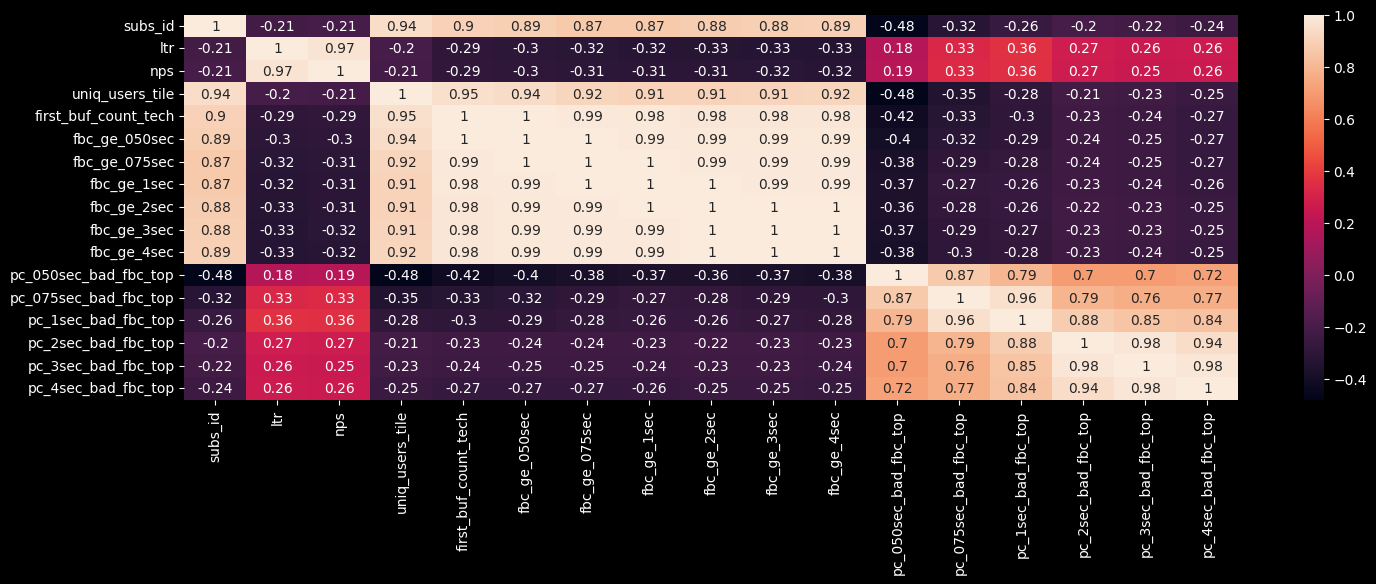

In [93]:
fig, ax = plt.subplots(figsize = (17, 5))
corr=tt[['subs_id', 'ltr', 'nps', 'uniq_users_tile',
       'first_buf_count_tech',
       'fbc_ge_050sec', 	'fbc_ge_075sec', 'fbc_ge_1sec',
       'fbc_ge_2sec', 'fbc_ge_3sec', 'fbc_ge_4sec',
       'pc_050sec_bad_fbc_top',	'pc_075sec_bad_fbc_top',	'pc_1sec_bad_fbc_top', 'pc_2sec_bad_fbc_top', 'pc_3sec_bad_fbc_top', 'pc_4sec_bad_fbc_top' ]].corr()

sns.heatmap(corr, annot = True)

In [101]:
tt.groupby(['region_nps'], as_index = False).agg({'pc_1sec_bad_fbc_top': 'mean'}).sort_values(by = 'pc_1sec_bad_fbc_top' , ascending=False).head(30)


,region_nps,pc_1sec_bad_fbc_top
20,Камчатка,0.753892
29,Магадан,0.744478
3,Биробиджан,0.741040
48,Сахалин,0.662662
58,Хабаровск,0.583204
7,Владивосток,0.566372
5,Бурятия,0.425902
59,Хакасия,0.391186
16,Иркутск,0.349379
12,Горно-Алтайск,0.331584


In [24]:
"""t = df.groupby(['report_date', 'region_nps', 'home_tile'], as_index = False).agg({'subs_id': "count", "ltr":"mean",
                                                 "nps":"mean", 'fbc_ge_2sec_pc':"mean",	'fbc_ge_3sec_pc':"mean",	
                                                 'fbc_ge_4sec_pc':"mean", 'gap_2sec':"mean",	'gap_3sec':"mean",
                                                 'gap_4sec':"mean"}).sort_values(by = ['home_tile', 'report_date'], ascending = False).query('subs_id>=0')
t"""

't = df.groupby([\'report_date\', \'region_nps\', \'home_tile\'], as_index = False).agg({\'subs_id\': "count", "ltr":"mean",\n                                                 "nps":"mean", \'fbc_ge_2sec_pc\':"mean",\t\'fbc_ge_3sec_pc\':"mean",\t\n                                                 \'fbc_ge_4sec_pc\':"mean", \'gap_2sec\':"mean",\t\'gap_3sec\':"mean",\n                                                 \'gap_4sec\':"mean"}).sort_values(by = [\'home_tile\', \'report_date\'], ascending = False).query(\'subs_id>=0\')\nt'

In [104]:
t = tt.copy()
t

,report_date,region_nps,subs_id,uniq_users_tile,first_buf_count_tech,fbc_ge_050sec,fbc_ge_075sec,fbc_ge_1sec,fbc_ge_2sec,fbc_ge_3sec,fbc_ge_4sec,pc_050sec_bad_fbc_top,pc_075sec_bad_fbc_top,pc_1sec_bad_fbc_top,pc_2sec_bad_fbc_top,pc_3sec_bad_fbc_top,pc_4sec_bad_fbc_top,ltr,nps
0,01.01.2022,Архангельск,310,11440830.0,29457442.0,27213491.5,22197387.5,16285054.5,5348203.5,2699288.5,1658133.0,0.684677,0.392127,0.190152,0.024728,0.008346,0.004782,6.926357,0.058140
1,01.01.2022,Барнаул,162,1802673.0,2088610.0,1902258.0,1686572.0,1304739.0,392827.0,184835.0,107574.0,0.604428,0.501397,0.341831,0.035654,0.010415,0.005730,8.354610,0.418440
2,01.01.2022,Белгород,583,11286135.0,15249658.0,13523148.0,10453112.0,7664477.0,2869951.0,1547969.0,989415.0,0.535697,0.289260,0.144365,0.020227,0.007714,0.004485,7.183884,0.123967
3,01.01.2022,Биробиджан,59,95199.0,161620.0,136240.0,107558.0,87642.0,33835.0,12969.0,6770.0,0.891648,0.852924,0.801909,0.283296,0.085607,0.038070,7.512195,0.292683
4,01.01.2022,Брянск,312,7287610.0,9408577.0,8045585.0,5874257.0,4144300.0,1461491.0,772141.0,487211.0,0.530684,0.273591,0.141482,0.024511,0.010389,0.005416,7.015094,0.101887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,01.12.2022,Хакасия,303,5741191.0,9739322.0,8791556.0,7879355.0,6379673.0,2148074.0,1024187.0,588861.0,0.685841,0.572041,0.386107,0.056661,0.018569,0.008827,7.864151,0.362264
1000,01.12.2022,Челябинск,2876,81558568.0,175252799.0,158065229.5,133400316.5,99894096.5,35259632.0,17203644.0,9848506.0,0.575848,0.432083,0.244459,0.032411,0.010746,0.004676,6.700751,0.054304
1001,01.12.2022,Чувашия,371,11725359.0,17801783.5,15700315.0,12543972.5,9228788.0,3440243.0,1731014.5,1009283.0,0.573789,0.378248,0.207358,0.038318,0.013012,0.006269,7.573379,0.300341
1002,01.12.2022,ЯНАО,254,4653240.0,14377236.0,12922711.5,11377949.5,8695554.0,2950898.5,1440001.0,837689.5,0.631839,0.498934,0.294818,0.043768,0.015414,0.006754,6.935961,0.128079


добавляем расчетные метрики

In [105]:
t['fbc_ge_05sec_pc'] = t['fbc_ge_050sec']/t['first_buf_count_tech']
t['fbc_ge_075sec_pc'] = t['fbc_ge_075sec']/t['first_buf_count_tech']
t['fbc_ge_1sec_pc'] = t['fbc_ge_1sec']/t['first_buf_count_tech']
t['fbc_ge_2sec_pc'] = t['fbc_ge_2sec']/t['first_buf_count_tech']
t['fbc_ge_3sec_pc'] = t['fbc_ge_3sec']/t['first_buf_count_tech']
t['fbc_ge_4sec_pc'] = t['fbc_ge_4sec']/t['first_buf_count_tech']


t['gap_05sec'] = t['fbc_ge_05sec_pc']-t['pc_2sec_bad_fbc_top']
t['gap_075sec'] = t['fbc_ge_075sec_pc']-t['pc_3sec_bad_fbc_top']
t['gap_1sec'] = t['fbc_ge_1sec_pc']-t['pc_4sec_bad_fbc_top']
t['gap_2sec'] = t['fbc_ge_2sec_pc']-t['pc_2sec_bad_fbc_top']
t['gap_3sec'] = t['fbc_ge_3sec_pc']-t['pc_3sec_bad_fbc_top']
t['gap_4sec'] = t['fbc_ge_4sec_pc']-t['pc_4sec_bad_fbc_top']

In [109]:
t

,report_date,region_nps,subs_id,uniq_users_tile,first_buf_count_tech,fbc_ge_050sec,fbc_ge_075sec,fbc_ge_1sec,fbc_ge_2sec,fbc_ge_3sec,fbc_ge_4sec,pc_050sec_bad_fbc_top,pc_075sec_bad_fbc_top,pc_1sec_bad_fbc_top,pc_2sec_bad_fbc_top,pc_3sec_bad_fbc_top,pc_4sec_bad_fbc_top,ltr,nps,fbc_ge_05sec_pc,fbc_ge_075sec_pc,fbc_ge_1sec_pc,fbc_ge_2sec_pc,fbc_ge_3sec_pc,fbc_ge_4sec_pc,gap_05sec,gap_075sec,gap_1sec,gap_2sec,gap_3sec,gap_4sec
0,01.01.2022,Архангельск,310,11440830.0,29457442.0,27213491.5,22197387.5,16285054.5,5348203.5,2699288.5,1658133.0,0.684677,0.392127,0.190152,0.024728,0.008346,0.004782,6.926357,0.058140,0.923824,0.753541,0.552833,0.181557,0.091633,0.056289,0.899096,0.745195,0.548051,0.156829,0.083287,0.051507
1,01.01.2022,Барнаул,162,1802673.0,2088610.0,1902258.0,1686572.0,1304739.0,392827.0,184835.0,107574.0,0.604428,0.501397,0.341831,0.035654,0.010415,0.005730,8.354610,0.418440,0.910777,0.807509,0.624692,0.188081,0.088497,0.051505,0.875123,0.797094,0.618963,0.152427,0.078081,0.045776
2,01.01.2022,Белгород,583,11286135.0,15249658.0,13523148.0,10453112.0,7664477.0,2869951.0,1547969.0,989415.0,0.535697,0.289260,0.144365,0.020227,0.007714,0.004485,7.183884,0.123967,0.886784,0.685465,0.502600,0.188198,0.101508,0.064881,0.866556,0.677751,0.498115,0.167970,0.093794,0.060396
3,01.01.2022,Биробиджан,59,95199.0,161620.0,136240.0,107558.0,87642.0,33835.0,12969.0,6770.0,0.891648,0.852924,0.801909,0.283296,0.085607,0.038070,7.512195,0.292683,0.842965,0.665499,0.542272,0.209349,0.080244,0.041888,0.559669,0.579892,0.504202,-0.073947,-0.005363,0.003818
4,01.01.2022,Брянск,312,7287610.0,9408577.0,8045585.0,5874257.0,4144300.0,1461491.0,772141.0,487211.0,0.530684,0.273591,0.141482,0.024511,0.010389,0.005416,7.015094,0.101887,0.855133,0.624351,0.440481,0.155336,0.082068,0.051784,0.830622,0.613962,0.435066,0.130825,0.071678,0.046368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,01.12.2022,Хакасия,303,5741191.0,9739322.0,8791556.0,7879355.0,6379673.0,2148074.0,1024187.0,588861.0,0.685841,0.572041,0.386107,0.056661,0.018569,0.008827,7.864151,0.362264,0.902687,0.809025,0.655043,0.220557,0.105160,0.060462,0.846025,0.790456,0.646216,0.163895,0.086591,0.051635
1000,01.12.2022,Челябинск,2876,81558568.0,175252799.0,158065229.5,133400316.5,99894096.5,35259632.0,17203644.0,9848506.0,0.575848,0.432083,0.244459,0.032411,0.010746,0.004676,6.700751,0.054304,0.901927,0.761188,0.570000,0.201193,0.098165,0.056196,0.869516,0.750442,0.565324,0.168782,0.087419,0.051520
1001,01.12.2022,Чувашия,371,11725359.0,17801783.5,15700315.0,12543972.5,9228788.0,3440243.0,1731014.5,1009283.0,0.573789,0.378248,0.207358,0.038318,0.013012,0.006269,7.573379,0.300341,0.881952,0.704647,0.518419,0.193253,0.097238,0.056696,0.843634,0.691635,0.512151,0.154935,0.084226,0.050427
1002,01.12.2022,ЯНАО,254,4653240.0,14377236.0,12922711.5,11377949.5,8695554.0,2950898.5,1440001.0,837689.5,0.631839,0.498934,0.294818,0.043768,0.015414,0.006754,6.935961,0.128079,0.898831,0.791386,0.604814,0.205248,0.100158,0.058265,0.855063,0.775973,0.598060,0.161480,0.084745,0.051511


<Axes: >

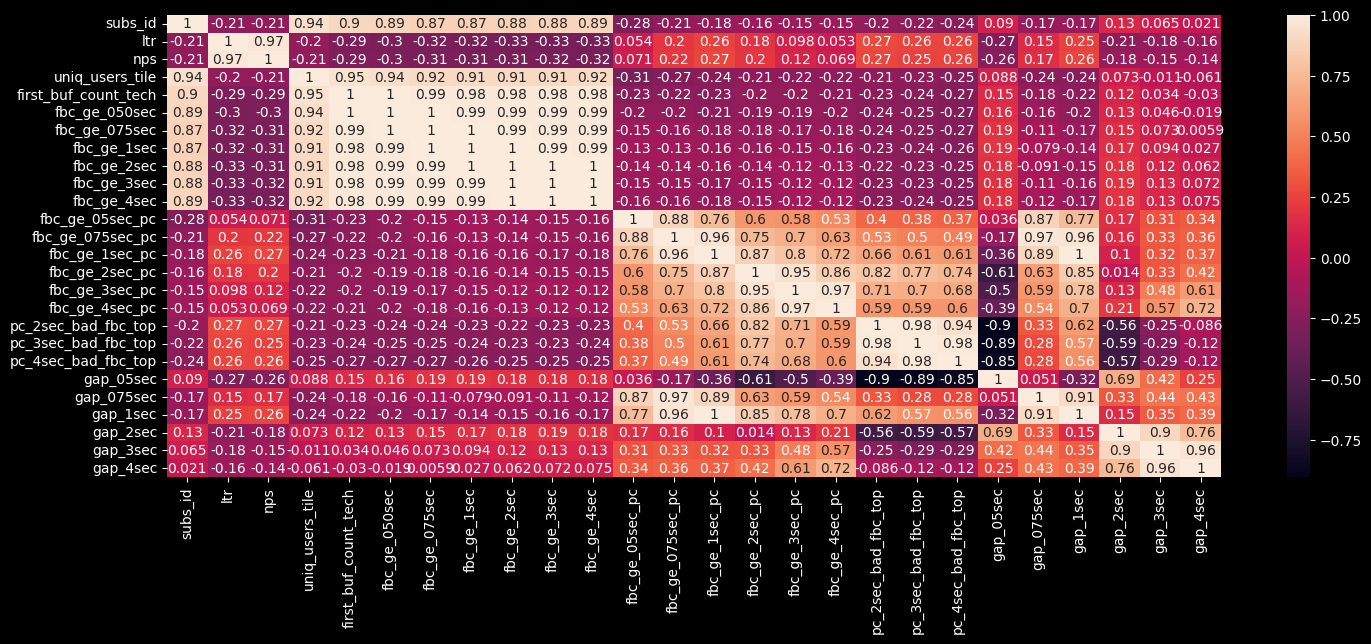

In [114]:
ax, fig = plt.subplots(figsize = (17, 6))
sns.heatmap(t[['subs_id','ltr', 'nps', 'uniq_users_tile',
       'first_buf_count_tech',  
       
       'fbc_ge_050sec', 'fbc_ge_075sec', 'fbc_ge_1sec',
       'fbc_ge_2sec', 'fbc_ge_3sec', 'fbc_ge_4sec',

       'fbc_ge_05sec_pc', 'fbc_ge_075sec_pc', 'fbc_ge_1sec_pc',
       'fbc_ge_2sec_pc', 'fbc_ge_3sec_pc', 'fbc_ge_4sec_pc', 
       'pc_2sec_bad_fbc_top', 'pc_3sec_bad_fbc_top', 'pc_4sec_bad_fbc_top',
       
       
       'gap_05sec',  'gap_075sec' ,'gap_1sec',
       'gap_2sec',
       'gap_3sec', 'gap_4sec']].corr(), annot = True)

<Axes: >

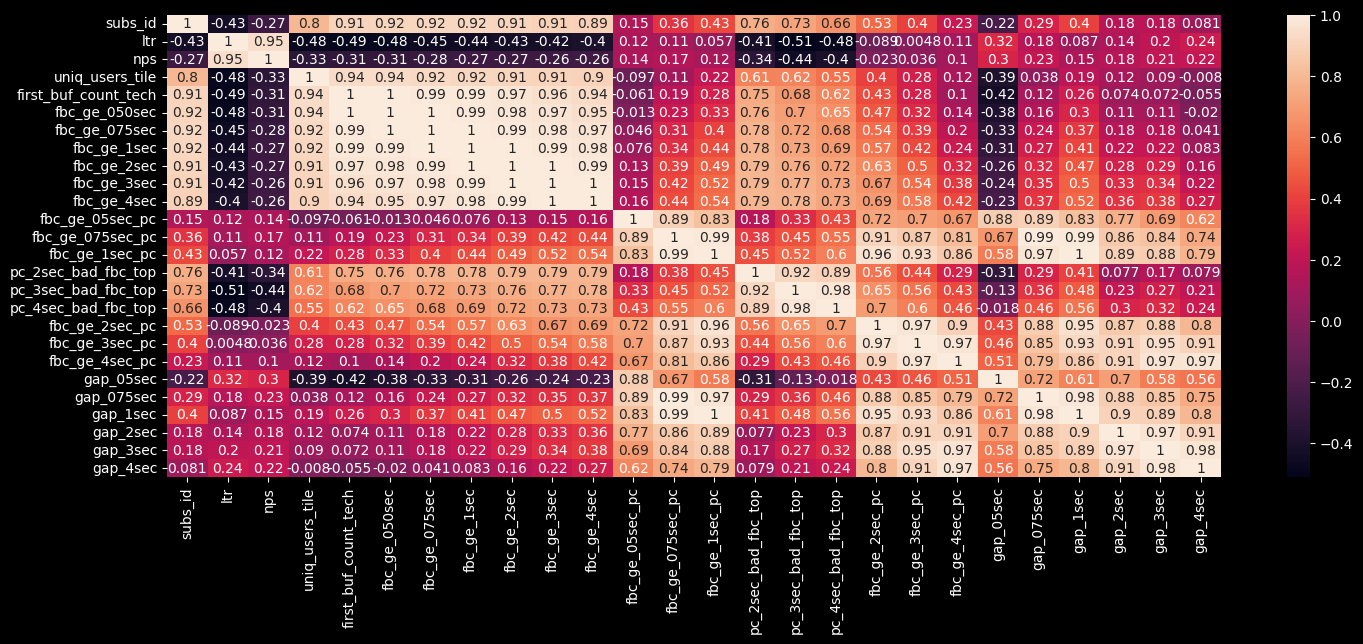

In [113]:


ax, fig = plt.subplots(figsize = (17, 6))
sns.heatmap(t.query("region_nps == 'Мордовия' ")[['subs_id','ltr', 'nps', 'uniq_users_tile',
       'first_buf_count_tech',  
       
       'fbc_ge_050sec', 'fbc_ge_075sec', 'fbc_ge_1sec',
       'fbc_ge_2sec', 'fbc_ge_3sec', 'fbc_ge_4sec',

       'fbc_ge_05sec_pc', 'fbc_ge_075sec_pc', 'fbc_ge_1sec_pc',
       'pc_2sec_bad_fbc_top', 'pc_3sec_bad_fbc_top', 'pc_4sec_bad_fbc_top',
       'fbc_ge_2sec_pc', 'fbc_ge_3sec_pc', 'fbc_ge_4sec_pc', 
       
       'gap_05sec',  'gap_075sec' ,'gap_1sec',
       'gap_2sec',
       'gap_3sec', 'gap_4sec']].corr(), annot = True)

<Axes: ylabel='Frequency'>

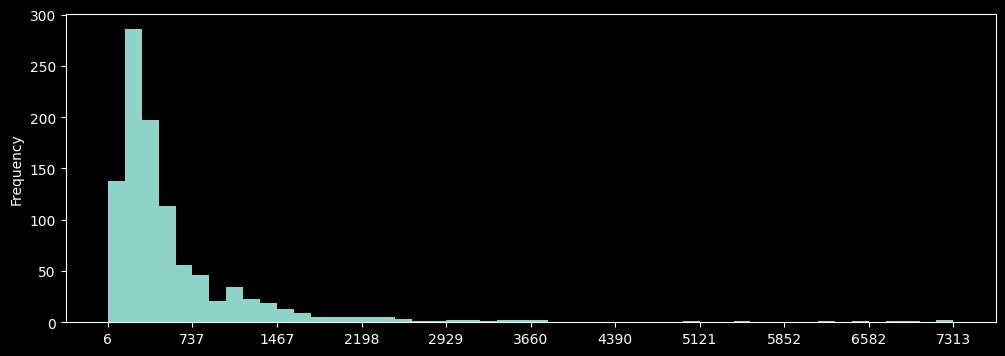

In [58]:
#распределенеие по бинам 
count, bin_edges = np.histogram(t.subs_id) #вычисляет количество элементов в каждом бине (count) и границы бинов (bin_edges)
t.subs_id.plot(kind = "hist", bins = 50, figsize=(12,4), xticks=bin_edges )

Уравнение регрессии: y = -0.5666989209360893x + 0.24; R² = 0.03


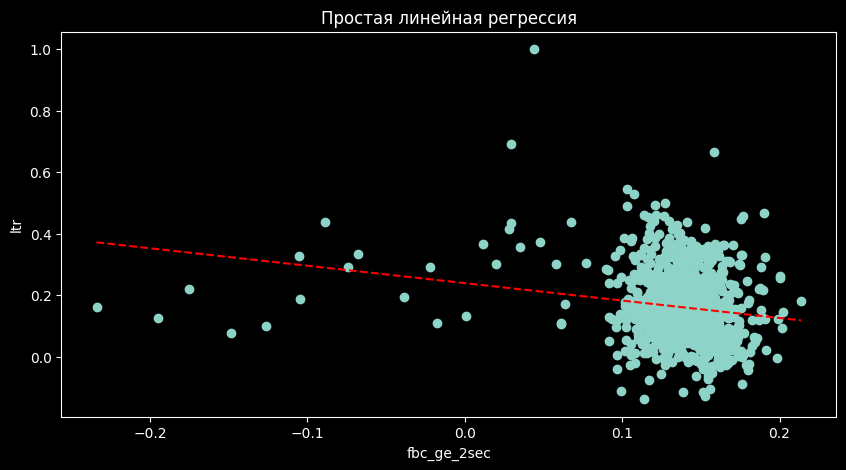

In [121]:
X = t['gap_2sec']
y = t['nps']
# Создать и обучить модель множественной регрессии на исходных данных
reg = LinearRegression()
reg.fit(X.values.reshape(-1, 1), y)

# Вычислить коэффициенты и сдвиг регрессии
coef = reg.coef_
c = reg.intercept_

# Вычислить коэффициент детерминации R² для модели
r2 = reg.score(X.values.reshape(-1, 1), y)

# Вывести уравнение регрессии и коэффициент детерминации R² на экран
print(f"Уравнение регрессии: y = {coef[0]}x + {round(c,2)}; R² = {round(r2, 2)}")

# Сгенерировать новые значения для переменной X для построения графика регрессии
x_values = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Сделать прогнозы для новых значений переменной X, используя обученную модель
y_pred = reg.predict(x_values)

# Построить график исходных данных и регрессионной модели
plt.figure(figsize=(10,5))
plt.scatter(X, y)
plt.plot(x_values, y_pred, '--r')
plt.xlabel('fbc_ge_2sec')
plt.ylabel('ltr')
plt.title('Простая линейная регрессия')
plt.show()

In [122]:
X = t['gap_2sec']
y = t['nps']
X_log = np.log(X)
# Преобразовать переменную X в полиномиальные признаки первой степени
poly_features = PolynomialFeatures(degree=1)
X_poly = poly_features.fit_transform(X_log.values.reshape(-1, 1))
# Создать и обучить модель множественной регрессии на полиномиальных признаках первой степени
reg = LinearRegression()
reg.fit(X_poly, y)
# Вычислить коэффициенты и сдвиг регрессии
coef = reg.coef_
c = reg.intercept_
# Вычислить коэффициент детерминации R² для модели
r2 = reg.score(X_poly, y)
# Вывести уравнение регрессии и коэффициент детерминации R² на экран
print(f"Уравнение регрессии: y = {coef[1]}x + {round(c,2)}; R² = {round(r2, 2)}")
# Сгенерировать новые значения для переменной X для построения графика регрессии
x_values = np.linspace(X_log.min(), X_log.max(), 100).reshape(-1, 1)
x_values_poly = poly_features.transform(x_values)
# Сделать прогнозы для новых значений переменной X, используя обученную модель
y_pred = reg.predict(x_values_poly)
# Построить график исходных данных и регрессионной модели 
plt.figure(figsize=(10,5))
plt.scatter(X_log, y)
plt.plot(x_values, y_pred, '--r')
plt.xlabel('log(fbc_ge_2sec)')
plt.ylabel('ltr')
plt.title('Простая линейная регрессия')
plt.show()

c:\Users\vitaly.flerin\Miniconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: Input X contains NaN.
PolynomialFeatures does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Обучение модели на обучающей выборке
reg.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = reg.predict(X_test)

# Расчет MSE, MAE и RMSE на тестовой выборке
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Вывод результатов
print(f"MSE: {round(mse, 2)}, MAE: {round(mae, 2)}, RMSE: {round(rmse, 2)}")

MSE: 0.12, MAE: 0.27, RMSE: 0.34


На графике показана зависимость между переменными fbc_ge_2sec и ltr. Точки на графике показывают исходные данные, красная линия показывает регрессионную модель. 
Модель показывает, что есть некоторая обратная зависимость между переменной fbc_ge_2sec и переменной ltr, то есть чем выше значение fbc_ge_2sec, тем ниже значение ltr. 
Однако коэффициент детерминации R² составляет всего 0.31, что означает, что модель объясняет только часть дисперсии данных и не является очень точной.

In [72]:
t.sort_values(by = 'nps', ascending = True).head(50)

,report_date,region_nps,subs_id,ltr,nps,uniq_users_tile,first_buf_count_tech,fbc_ge_2sec,fbc_ge_3sec,fbc_ge_4sec,pc_2sec_bad_fbc_top,pc_3sec_bad_fbc_top,pc_4sec_bad_fbc_top,fbc_ge_2sec_pc,fbc_ge_3sec_pc,fbc_ge_4sec_pc,gap_2sec,gap_3sec,gap_4sec
696,01.08.2022,В.Новгород,145,6.369231,-0.138462,9861090.0,20831412.0,2892587.0,1420128.0,836105.0,0.002658,2.066036e-05,0.000000e+00,0.138857,0.068172,0.040137,0.136199,0.068152,0.040137
797,01.09.2022,Самара,579,6.265182,-0.127530,23778263.0,37662979.0,7764561.0,4155105.0,2621575.0,0.017787,2.393706e-03,2.592683e-05,0.206159,0.110323,0.069606,0.188372,0.107930,0.069580
735,01.08.2022,Самара,208,6.370558,-0.116751,10650798.0,13954126.0,2599364.0,1354306.0,843040.0,0.022036,9.619789e-04,1.023070e-05,0.186279,0.097054,0.060415,0.164243,0.096092,0.060405
859,01.10.2022,Самара,659,6.273567,-0.114603,29311959.5,49124142.0,10839284.5,5797976.0,3620594.0,0.028729,4.232381e-03,1.517026e-03,0.220651,0.118027,0.073703,0.191922,0.113795,0.072186
631,01.07.2022,Биробиджан,9,7.111111,-0.111111,12183.0,46710.0,16372.0,7496.0,4632.0,0.141189,3.634991e-02,1.389218e-02,0.350503,0.160480,0.099165,0.209314,0.124130,0.085273
68,01.01.2023,В.Новгород,181,6.300654,-0.104575,11566179.0,33865131.0,6074701.0,3085668.0,1810551.0,0.000731,2.308762e-05,0.000000e+00,0.179379,0.091116,0.053464,0.178649,0.091093,0.053464
188,01.02.2023,Архангельск,477,6.314667,-0.088000,36699000.0,105429088.0,23016253.5,11774740.0,7025080.5,0.022194,1.988389e-04,7.550673e-05,0.218310,0.111684,0.066633,0.196117,0.111485,0.066558
690,01.08.2022,Архангельск,235,6.414286,-0.076190,19264568.0,43480681.5,6716194.5,3185764.5,1872099.5,0.020822,3.229371e-03,9.597368e-06,0.154464,0.073269,0.043056,0.133642,0.070039,0.043046
252,01.03.2022,Архангельск,310,6.552727,-0.072727,24320278.0,63546511.0,11601966.0,5870490.0,3604851.0,0.018742,9.624613e-04,0.000000e+00,0.182574,0.092381,0.056728,0.163832,0.091419,0.056728
126,01.02.2022,Архангельск,257,6.506787,-0.063348,20426019.0,47214647.0,8529149.0,4328827.0,2668505.0,0.017091,8.537522e-07,0.000000e+00,0.180646,0.091684,0.056519,0.163555,0.091683,0.056519


Полиномиальная регрессия

Уравнение регрессии: y = 5.805973321743781e-17x² + -7.016796799255825e-09x + 0.21; R² = 0.17


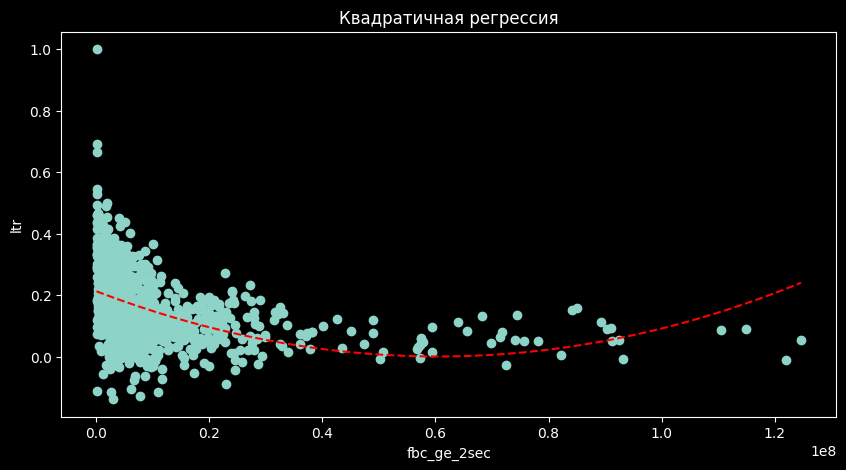

In [80]:
X = t['fbc_ge_2sec']
y = t['nps']
# Преобразовать переменную X в полиномиальные признаки второй степени
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X.values.reshape(-1, 1))

# Создать и обучить модель множественной регрессии
reg = LinearRegression()
reg.fit(X_poly, y)

# Вычислить коэффициенты и сдвиг регрессии
coef = reg.coef_
c = reg.intercept_

# Вычислить коэффициент детерминации R² для модели
r2 = reg.score(X_poly, y)

# Вывести уравнение регрессии и коэффициент детерминации R² на экран
print(f"Уравнение регрессии: y = {coef[2]}x² + {coef[1]}x + {round(c,2)}; R² = {round(r2, 2)}")

# Сгенерировать новые значения для переменной X для построения графика регрессии
x_values = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_values_poly = poly_features.transform(x_values)

# Сделать прогнозы для новых значений переменной X, используя обученную модель
y_pred = reg.predict(x_values_poly)

# Построить график исходных данных и регрессионной модели
plt.figure(figsize=(10,5))
plt.scatter(X, y)
plt.plot(x_values, y_pred, '--r')
plt.xlabel('fbc_ge_2sec')
plt.ylabel('ltr')
plt.title('Квадратичная регрессия')
plt.show()

Полиномиальная регрессия

Уравнение регрессии: y = 0.0009091616819243478x³ + -0.03851116378551156x² + 0.4889569646456586x + -1.56; R² = 0.28


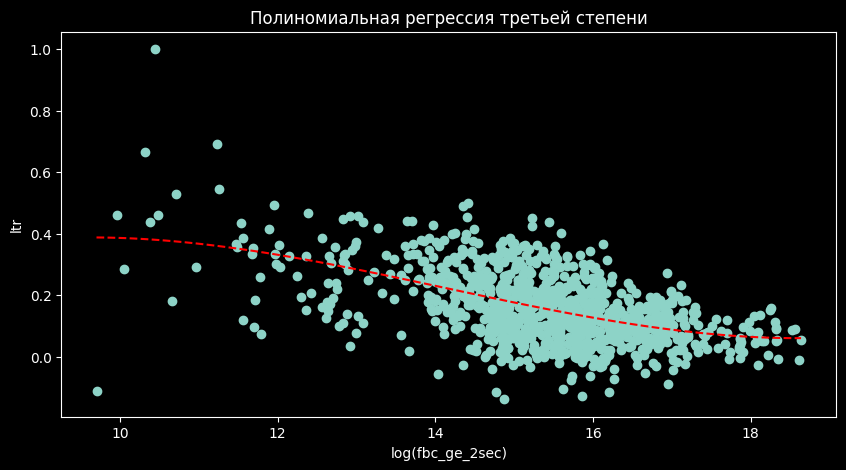

In [79]:
X = t['fbc_ge_2sec']
y = t['nps']
# Применить логарифмическое преобразование к переменной X
X_log = np.log(X)
# Преобразовать переменную X в полиномиальные признаки третьей степени
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X_log.values.reshape(-1, 1))
# Создать и обучить модель множественной регрессии
reg = LinearRegression()
reg.fit(X_poly, y)
# Вычислить коэффициенты и сдвиг регрессии
coef = reg.coef_
c = reg.intercept_
# Вычислить коэффициент детерминации R² для модели
r2 = reg.score(X_poly, y)
# Вывести уравнение регрессии и коэффициент детерминации R² на экран
print(f"Уравнение регрессии: y = {coef[3]}x³ + {coef[2]}x² + {coef[1]}x + {round(c,2)}; R² = {round(r2, 2)}")
# Сгенерировать новые значения для переменной X для построения графика регрессии
x_values = np.linspace(X_log.min(), X_log.max(), 100).reshape(-1, 1)
x_values_poly = poly_features.transform(x_values)
# Сделать прогнозы для новых значений переменной X, используя обученную модель
y_pred = reg.predict(x_values_poly)
# Построить график исходных данных и регрессионной модели
plt.figure(figsize=(10,5))
plt.scatter(X_log, y)
plt.plot(x_values, y_pred, '--r')
plt.xlabel('log(fbc_ge_2sec)')
plt.ylabel('ltr')
plt.title('Полиномиальная регрессия третьей степени')
plt.show()

In [23]:
df = t.copy()

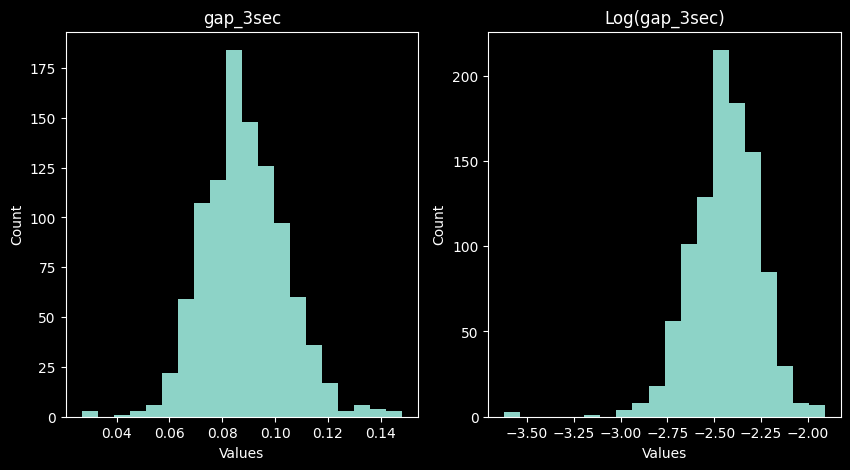

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5)) # создаем 1 строку и 2 колонки, указываем размер фигуры
axs[0].hist(df['gap_3sec'], bins=20) # гистограмма для переменной gap_3sec
axs[0].set_title('gap_3sec')
axs[1].hist(df['gap_3sec'].apply(np.log), bins=20) # гистограмма для переменной fbc_ge_2sec_pc с логарифмическим масштабом
axs[1].set_title('Log(gap_3sec)')
for ax in axs.flat:
    ax.set(xlabel='Values', ylabel='Count') # подписываем оси X и Y для каждой гистограммы
plt.show()

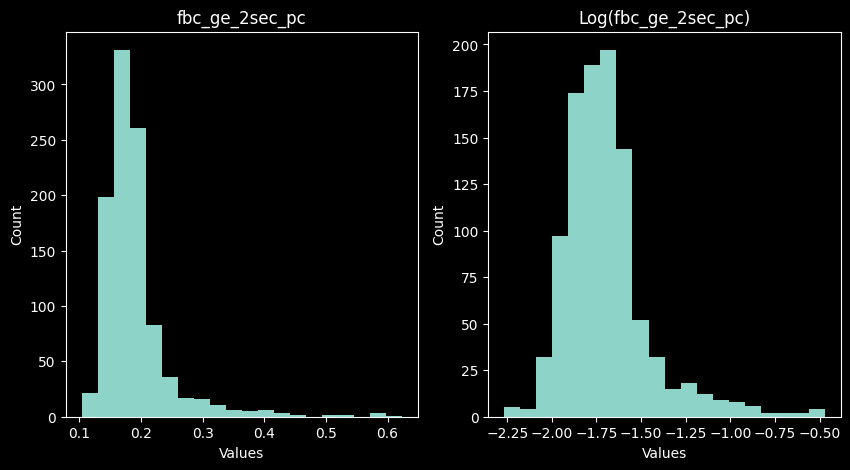

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5)) # создаем 1 строку и 2 колонки, указываем размер фигуры
axs[0].hist(df['fbc_ge_2sec_pc'], bins=20) # гистограмма для переменной gap_3sec
axs[0].set_title('fbc_ge_2sec_pc')
axs[1].hist(df['fbc_ge_2sec_pc'].apply(np.log), bins=20) # гистограмма для переменной fbc_ge_2sec_pc с логарифмическим масштабом
axs[1].set_title('Log(fbc_ge_2sec_pc)')
for ax in axs.flat:
    ax.set(xlabel='Values', ylabel='Count') # подписываем оси X и Y для каждой гистограммы  
plt.show()


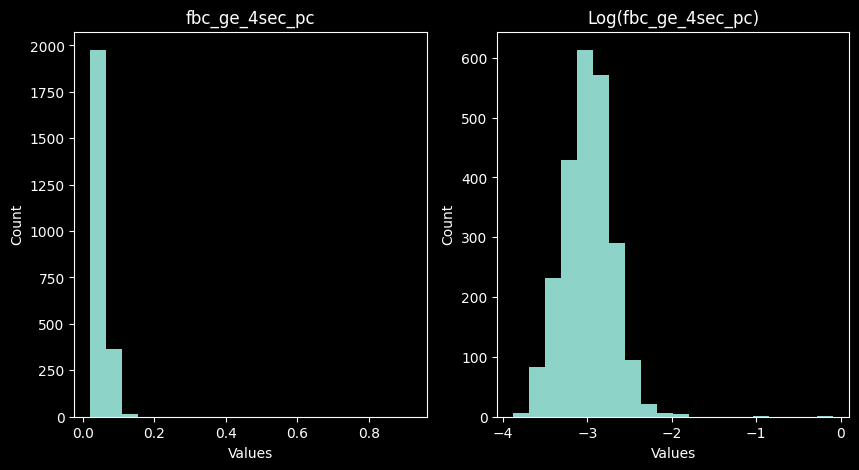

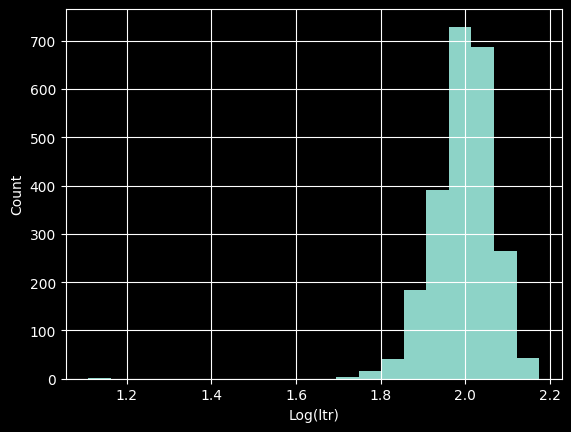

In [291]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5)) # создаем 1 строку и 2 колонки, указываем размер фигуры
axs[0].hist(df['fbc_ge_4sec_pc'], bins=20) # гистограмма для переменной gap_3sec
axs[0].set_title('fbc_ge_4sec_pc')
axs[1].hist(df['fbc_ge_4sec_pc'].apply(np.log), bins=20) # гистограмма для переменной fbc_ge_2sec_pc с логарифмическим масштабом
axs[1].set_title('Log(fbc_ge_4sec_pc)')
for ax in axs.flat:
    ax.set(xlabel='Values', ylabel='Count') # подписываем оси X и Y для каждой гистограммы
plt.show()
df['ltr'].apply(np.log).hist(bins=20)
plt.xlabel('Log(ltr)')
plt.ylabel('Count')
plt.show()


In [292]:
#чек на мультколлениарность
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[[ 'gap_3sec',  'fbc_ge_2sec_pc', 'fbc_ge_4sec_pc', 'nps']]
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

          Feature         VIF
0        gap_3sec  276.041085
1  fbc_ge_2sec_pc   88.553339
2  fbc_ge_4sec_pc   84.895863
3             nps    2.956949


мульти регр - 0


In [298]:
t1 = df[['gap_3sec', 'fbc_ge_2sec_pc', 'fbc_ge_4sec_pc', 'ltr']]

poly_features = PolynomialFeatures(degree=1)

X = t1.drop(columns=['ltr']) 
y = t1['ltr']

X_log = np.log(X) 
y_log = np.log(y)

X_poly = poly_features.fit_transform(X_log) 
y_poly = poly_features.fit_transform(y_log.values.reshape(-1, 1))

reg = LinearRegression() 
reg.fit(X_poly, y_poly)

coef = reg.coef_ 
c = reg.intercept_

r2 = reg.score(X_poly, y_poly)

print(f"Уравнение регрессии: ltr = {coef[0, 1]}*ln(gap_3sec) + {coef[0, 2]}*fbc_ge_2sec_pc + {coef[0, 3]}*fbc_ge_4sec_pc + {round(c[0], 2)}; R² = {round(r2, 2)}")

Уравнение регрессии: ltr = 0.0*ln(gap_3sec) + 0.0*fbc_ge_2sec_pc + 0.0*fbc_ge_4sec_pc + 1.0; R² = 0.53


Мульти полиномиальная ~ 01 

In [301]:

t1 = df[['gap_3sec', 'fbc_ge_2sec_pc', 'fbc_ge_4sec_pc', 'ltr']]

X = t1.drop(columns=['ltr']) 
y = t1['ltr']

X_log = np.log(X) 
y_log = np.log(y)

poly_reg = PolynomialFeatures(degree=2) 
X_poly = poly_reg.fit_transform(X_log) 
reg = LinearRegression() 
reg.fit(X_poly, y_log)

coef = np.exp(reg.coef_) 
c = reg.intercept_

r2 = reg.score(X_poly, y_log)

print(f"Уравнение регрессии: ltr = {round(c, 2)} + {round(coef[0], 2)}*gap_3sec + {round(coef[1], 2)}*fbc_ge_2sec_pc + {round(coef[2], 2)}*fbc_ge_4sec_pc + {round(coef[3], 2)}gap_3secfbc_ge_2sec_pc + {round(coef[4], 2)}gap_3secfbc_ge_4sec_pc + {round(coef[5], 2)}fbc_ge_2sec_pcfbc_ge_4sec_pc; R² = {round(r2, 2)}")

Уравнение регрессии: ltr = 1.46 + 1.0*gap_3sec + 0.01*fbc_ge_2sec_pc + 7.66*fbc_ge_4sec_pc + 15.62gap_3secfbc_ge_2sec_pc + 63.95gap_3secfbc_ge_4sec_pc + 1.85fbc_ge_2sec_pcfbc_ge_4sec_pc; R² = 0.1


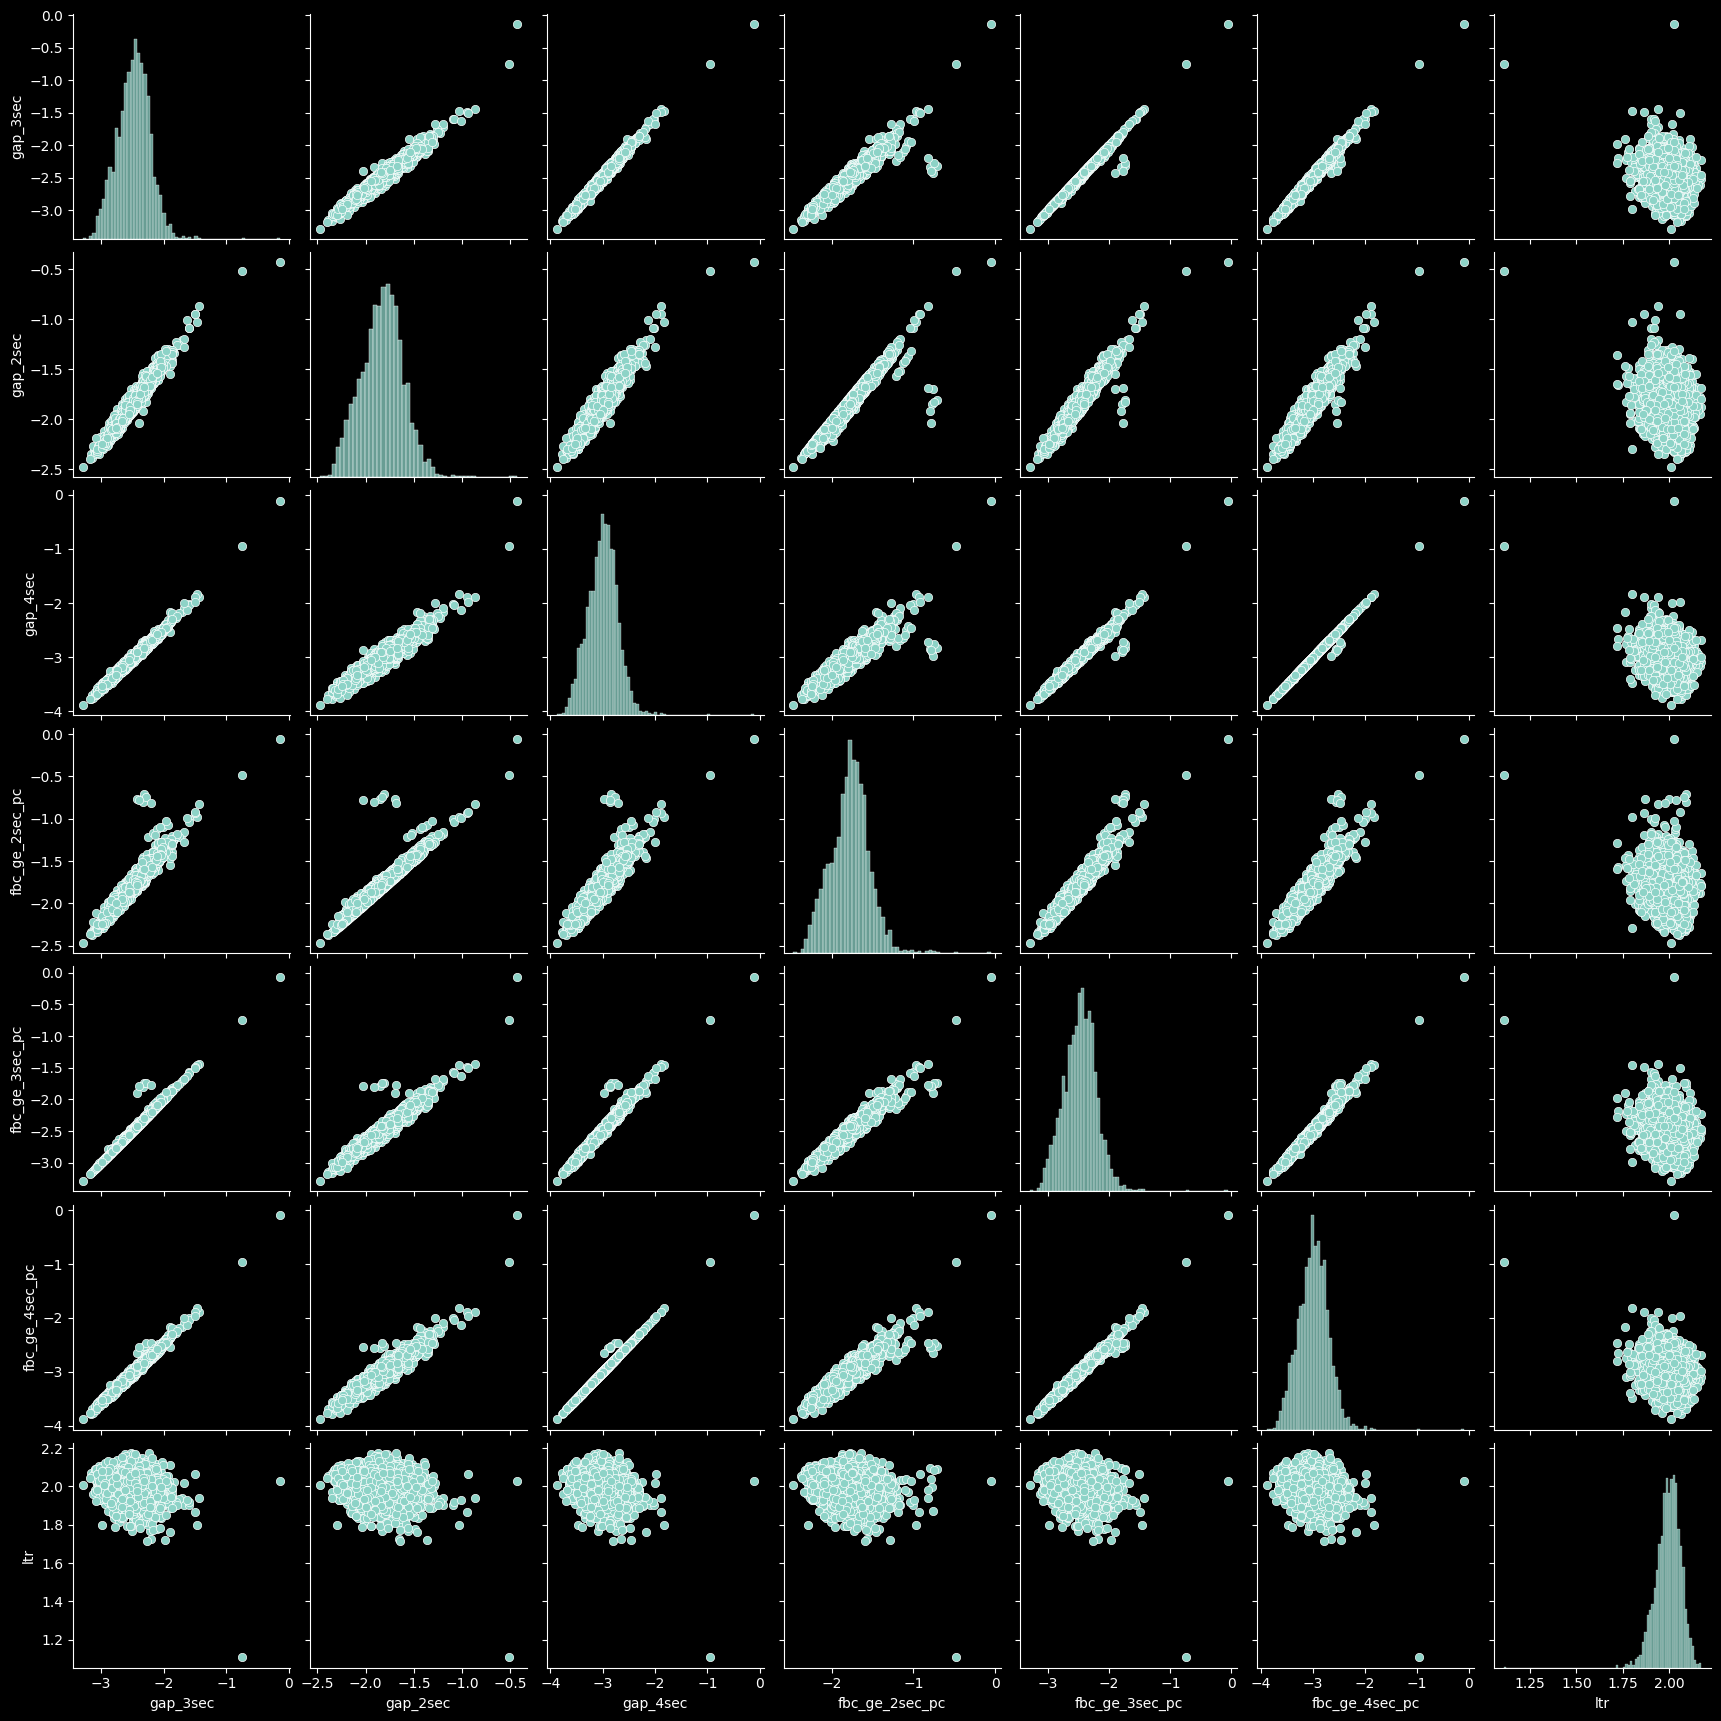

In [302]:
t1 = df[['gap_3sec', 'gap_2sec', 'gap_4sec', 'fbc_ge_2sec_pc', 'fbc_ge_3sec_pc', 'fbc_ge_4sec_pc', 'ltr']]

# создать датафрейм без зависимой переменной
t1_without_ltr = t1.drop(columns=['ltr'])

# добавить логарифмы переменных
t1_log = pd.DataFrame(np.log(t1_without_ltr), columns=t1_without_ltr.columns)

# объединить логарифмы переменных с целевой переменной
t1_log['ltr'] = np.log(t1['ltr'])

# нарисовать графики для каждой пары переменных
sns.pairplot(t1_log)